In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt

In [2]:
df = import_export.import_catalog(location='data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
                                                        , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
                                                        , 'depth_error', 'mag_err'])
kumamoto = {'coordinates':(130.763, 32.7545), 'time':'2016-04-14 12:26:00', 'tz':'UTC', 'magnitude':7.0}
eq = kumamoto
df_regional = polygon_selection.get_node_data(data=df, node=eq['coordinates'], radius=75, m=1)
df_regional = df_regional.loc[df_regional.index < eq['time']]
df_regional = df_regional[df_regional.depth <=25]
df_regional = df_regional[df_regional.mag >= 0.5]

In [63]:
n = 100
b_err_df = pd.DataFrame(stats.calc_bootstrapped_fmd_values(df_regional, n_calculations=n)
             ,columns=['a', 'b', 'bstd', 'n', 'mc'])
b_err_df.b.std()/np.sqrt(b_err_df.n.mean())

2.3815477618726051e-05

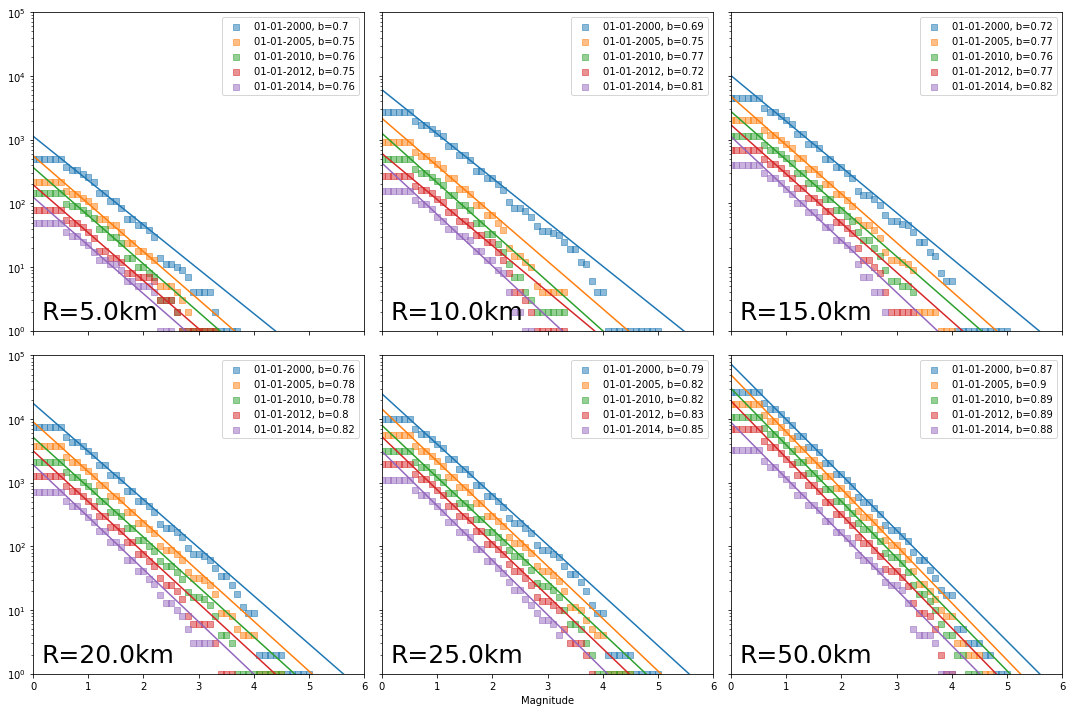

In [89]:
# radius 5
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharey=True, sharex=True)

# [item for sublist in l for item in sublist]

ax = [x for sublist in ax for x in sublist]

radii = [5., 10., 15., 20., 25., 50.]
time = ['01-01-2000', '01-01-2005', '01-01-2010', '01-01-2012', '01-01-2014']

# t = time[0]
# for axis in ax:
for axis, r in zip(ax, radii):
#     print(r)
    for t in time:
        df_hist = df_regional[df_regional.distance <= r]
        df_hist = df_hist.loc[df_hist.index >= t]
        hist, edges = np.histogram(a=df_hist.mag.values, bins=100, range=(0, 10))
        chist = np.cumsum(hist[::-1])[::-1]


        a, b, bstd, n, mc = stats.calc_fmd_stats_with_mc(df_hist.mag)

        axis.scatter(edges[:-1], chist, marker='s', label='{t}, b={b}'.format(t=t, b=round(b, 2))
              ,alpha=0.5)

        x = np.arange(0, 6, 0.01)
        y = 10**(a - b * x)
        axis.plot(x, y)
#     axis.set_title('radius={r}km'.format(r=r))

    axis.set_yscale('log')
    axis.set_ylim(1e0, 1e5)
    axis.set_xlim(0, 6)
    axis.legend()
    
    axis.text(s='R={r}km'.format(r=r), x=0.15, y=1.5e0, fontsize=25)

ax[4].set_xlabel('Magnitude')
plt.tight_layout()

In [38]:
y

array([ 116266.64526526])

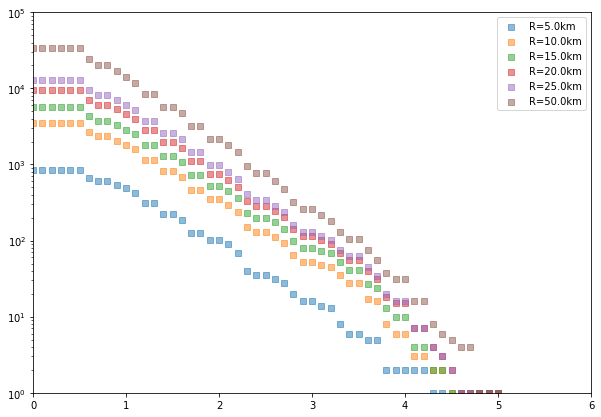

In [26]:
for r in radii:
    df_hist = df_regional[df_regional.distance <= r]
    a, b, bstd, n, mc = stats.calc_fmd_stats_with_mc(df_hist.mag)
    hist, edges = np.histogram(a=df_hist.mag.values, bins=100, range=(0, 10))
    chist = np.cumsum(hist[::-1])[::-1]

    ax.scatter(edges[:-1], chist, marker='s', label='R={r}km'.format(r=r)
              ,alpha=0.5)
    
    x = np.arange(0, 5, 100)
    y = 10**(a - b * x)
    ax.plot(x, y)
ax.set_yscale('log')
ax.set_ylim(1e0, 1e5)
ax.set_xlim(0, 6)
ax.legend()

In [27]:
b

0.78656031875969201